In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
'''
from google.colab import files
files.upload()
'''

'\nfrom google.colab import files\nfiles.upload()\n'

In [148]:
'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
'''

'\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n'

In [149]:
# !kaggle datasets download -d vikasukani/loan-eligible-dataset

In [150]:
# !unzip loan-eligible-dataset.zip

In [151]:
import os
os.getcwd()

'/content'

In [152]:
'''
!mkdir /content/drive/MyDrive/ML_Data/kaggle/loan_eligible
!cp loan-eligible-dataset.zip /content/drive/MyDrive/ML_Data/kaggle/loan_eligible
'''

'\n!mkdir /content/drive/MyDrive/ML_Data/kaggle/loan_eligible\n!cp loan-eligible-dataset.zip /content/drive/MyDrive/ML_Data/kaggle/loan_eligible\n'

In [153]:
'''
!rm loan-eligible-dataset.zip
!rm loan-test.csv
!rm loan-train.csv
'''

'\n!rm loan-eligible-dataset.zip\n!rm loan-test.csv\n!rm loan-train.csv\n'

In [154]:
'''
import zipfile

zip_object = zipfile.ZipFile('/content/drive/MyDrive/ML_Data/kaggle/loan_eligible/loan-eligible-dataset.zip')
zip_object.extractall('/content/drive/MyDrive/ML_Data/kaggle/loan_eligible')
'''

"\nimport zipfile\n\nzip_object = zipfile.ZipFile('/content/drive/MyDrive/ML_Data/kaggle/loan_eligible/loan-eligible-dataset.zip')\nzip_object.extractall('/content/drive/MyDrive/ML_Data/kaggle/loan_eligible')\n"

#  1. Load Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  2. EDA

In [156]:
train_full = pd.read_csv('/content/drive/MyDrive/ML_Data/kaggle/loan_eligible/loan-train.csv')

* Loan_ID &emsp;&emsp; Unique Loan ID
* Gender &emsp;&emsp; Male/ Female
* Married	&emsp;&emsp; Applicant married (Y/N)
* Dependents	&emsp;&emsp; Number of dependents
* Education	&emsp;&emsp; Applicant Education (Graduate/ Under Graduate)
* Self_Employed	&emsp;&emsp; Self-employed (Y/N)
* ApplicantIncome	&emsp;&emsp; Applicant income
* CoapplicantIncome	&emsp;&emsp; Coapplicant income
* LoanAmount	&emsp;&emsp; Loan amount in thousands
* Loan_Amount_Term	&emsp;&emsp; Term of a loan in months
* Credit_History	&emsp;&emsp; credit history meets guidelines
* Property_Area	&emsp;&emsp; Urban/ Semi-Urban/ Rural
* Loan_Status	&emsp;&emsp; Loan approved (Y/N)

* Objective: Predict a **Loan_Status** from train dataset

## 2.1. Copy data

In [157]:
train_full_c = train_full.copy()

## 2.2. Simple data exploration

### 2.2.1. head()

In [158]:
train_full.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
type(train_full)

pandas.core.frame.DataFrame

### 2.2.2. shape

In [160]:
train_full.shape

(614, 13)

### 2.2.3. info()

In [161]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* In test dataset, there are no Loan_Status which would be a dependent variable.

* peek up null values

### 2.2.4. check null values

In [162]:
# percentage of null values
train_full.isnull().sum() / 614

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

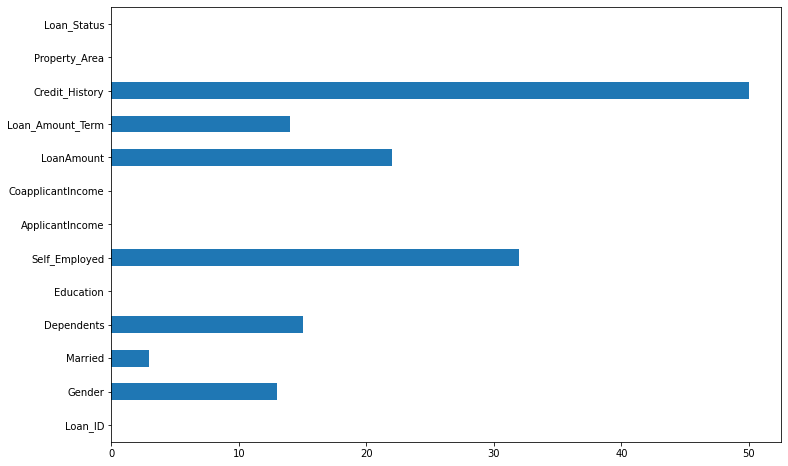

In [163]:
plt.figure(figsize=(12,8))
train_full.isnull().sum().plot(kind='barh')

## 2.3. Split Cat and Num attribs

In [164]:
train_cat = train_full_c.select_dtypes(include='object')
train_num = train_full_c.select_dtypes(exclude='object')

## 2.4. Num data exploration

### 2.4.1. Num data describe

In [165]:
train_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 2.4.2. Visualize the Num data distribution

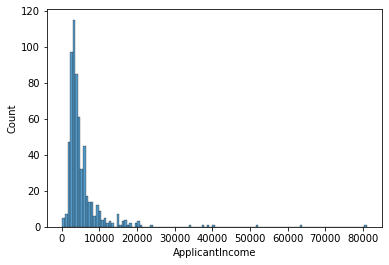

In [166]:
sns.histplot(data=train_num, x='ApplicantIncome')

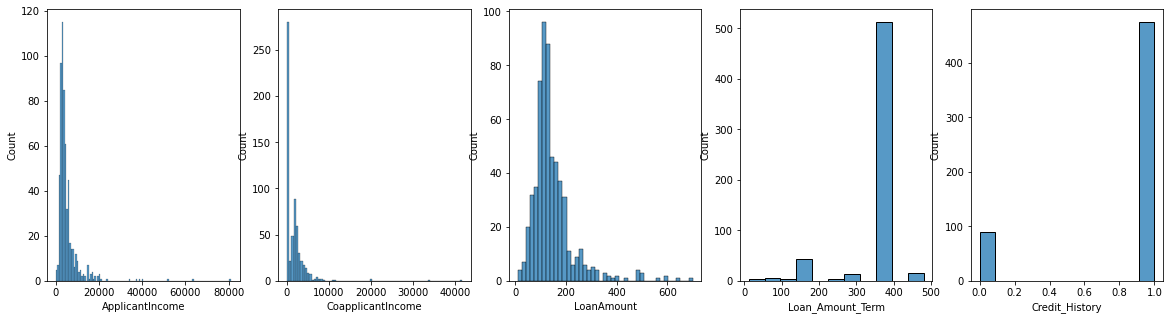

In [167]:
plt.figure(figsize=(20,5))

for i, col in enumerate(train_num.columns):
  plt.subplot(1,5,i+1)
  sns.histplot(data=train_num, x=col)

plt.show()

* All of the data are imbalanced
* ApplicantIncome, CoapplicantIncome, LoanAmount values are skewed to the left
* Loan_Amount_Term and Credit_History values are skewed to the right
* Credit_History values could be considered as cat values (0,1)
* Loan_Amount_Term also could be considered as cat values after feature 
engineering

# How to handle skewed data in machine learning?
https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725
* tree-based models are not affected
* I would compare two models
* 1. general standardized data
* 2. log scaled data

## 2.5. Cat data exploration

### 2.5.1. Cat data describe

In [168]:
train_cat.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### 2.5.2. Add Credit_History column to Cat data

In [169]:
# add Credit_History to train_cat
train_full_c['Credit_History'] = train_full_c['Credit_History'].astype('object')
train_cat = pd.concat([train_cat, train_full_c['Credit_History']], axis=1)
train_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,1.0
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y,1.0
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1.0
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1.0
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1.0


In [170]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_ID         614 non-null    object
 1   Gender          601 non-null    object
 2   Married         611 non-null    object
 3   Dependents      599 non-null    object
 4   Education       614 non-null    object
 5   Self_Employed   582 non-null    object
 6   Property_Area   614 non-null    object
 7   Loan_Status     614 non-null    object
 8   Credit_History  564 non-null    object
dtypes: object(9)
memory usage: 43.3+ KB


### 2.5.3. value_counts() and visualize the Cat data distribution

In [171]:
# simple EDA for cat data

for col in train_cat.columns[1:]:
  print(f'<{col}>: {train_cat[col].unique()}')
  print(f'{train_cat[col].value_counts(dropna=False)}')
  print()

<Gender>: ['Male' 'Female' nan]
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<Married>: ['No' 'Yes' nan]
Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<Dependents>: ['0' '1' '2' '3+' nan]
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

<Education>: ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<Self_Employed>: ['No' 'Yes' nan]
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<Property_Area>: ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<Loan_Status>: ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64

<Credit_History>: [1.0 0.0 nan]
1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64



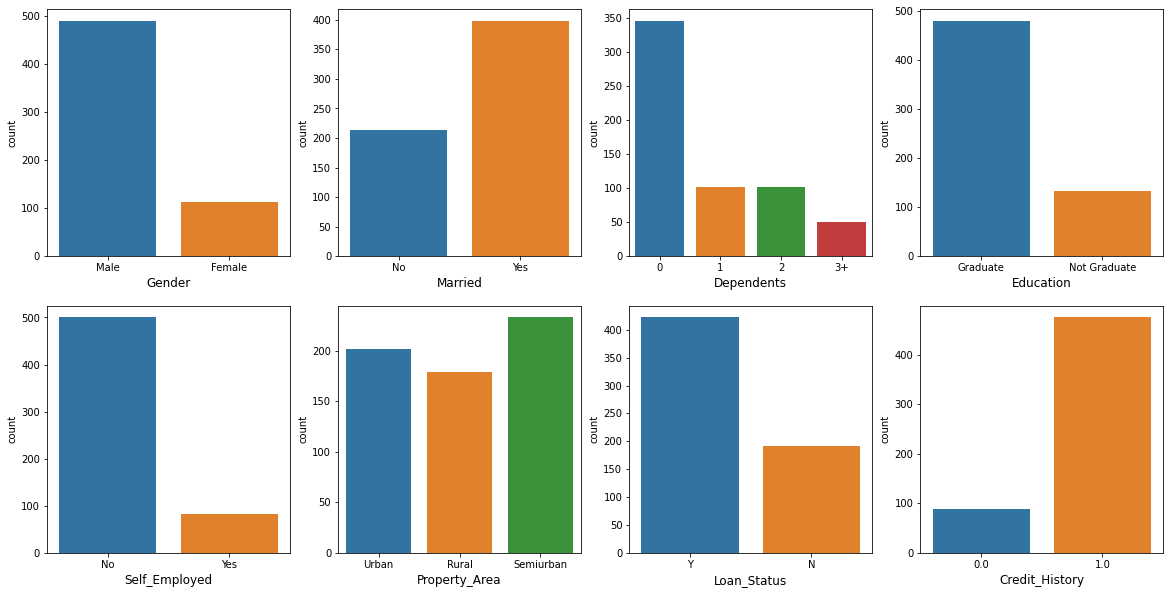

In [172]:
# visualize the value_counts()

plt.figure(figsize=(20,10))

for i, col in enumerate(train_cat.columns[1:]):
  plt.subplot(2,4,i+1)
  sns.countplot(x=col, data=train_cat)
  plt.xlabel(col, fontsize=12)

plt.show()

* Except for Property_Area, most of the columns are imbalanced

## 2.6. Convert Loan_ID to integer
* split string 'LP00' and else, then transform the dtypes to integer

In [173]:
train_full_c['Loan_ID']

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [174]:
Loan_ID_num = train_full_c['Loan_ID'].str.split('LP00', expand=True)[1]
Loan_ID_num = Loan_ID_num.astype('int64')

In [175]:
type(Loan_ID_num)

pandas.core.series.Series

In [176]:
# convert the dtype (Series -> DataFrame)
Loan_ID_num = pd.DataFrame({'Loan_ID_num':Loan_ID_num})

In [177]:
train_full_c = pd.concat([train_full_c, Loan_ID_num], axis=1)
train_full_c

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_num
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1002
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984


* value_counts() for the Loan_Amoun_Term

## 2.7. Add new column Loan_Amount_Term_360

In [178]:
train_num['Loan_Amount_Term'].isnull().sum()

14

In [179]:
train_num['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

* We can see that 360.0 is the most popular Loan_Amount_Term

In [180]:
train_full_c['Loan_Amount_Term_360'] = train_full_c['Loan_Amount_Term'] == 360.0
train_full_c

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_num,Loan_Amount_Term_360
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1002,True
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003,True
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978,True
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979,False
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983,True
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984,True


## 2.8. Heatmap

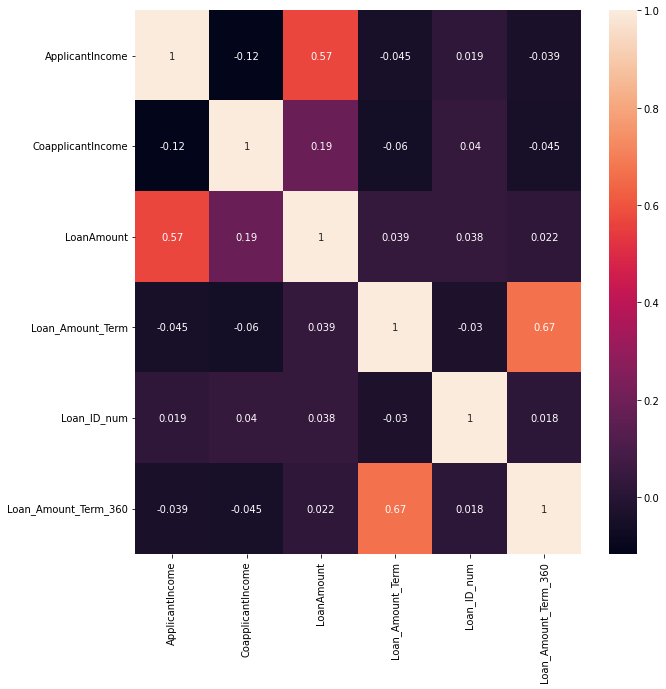

In [181]:
plt.figure(figsize=(10,10))
sns.heatmap(train_full_c.corr(), annot=True)

* ApplicantIncome and LoanAmount has a strong positive correlation

## 2.9. crosstab

<Figure size 864x720 with 0 Axes>

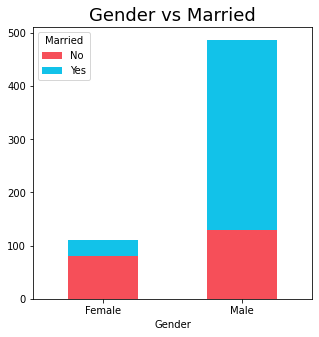

In [182]:
plt.figure(figsize=(12,10))
pd.crosstab(train_full_c['Gender'],train_full_c['Married']).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married', fontsize=18)
plt.xticks(rotation=0)
plt.show()

* Most of the male applicants are married

# 3. Data Preprocessing

## 3.1. Drop unnecessary columns

In [183]:
train_full_c = train_full_c.drop(columns='Loan_ID')
train_full_c

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID_num,Loan_Amount_Term_360
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1002,True
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003,True
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978,True
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979,False
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983,True
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984,True


## 3.2. Data Imputation

In [184]:
train_full_c = train_full_c.drop(columns=['Loan_ID_num', 'Loan_Amount_Term'])

In [185]:
train_cat = train_full_c.select_dtypes(exclude='number')
train_num = train_full_c.select_dtypes(include='number')

In [186]:
cat_attribs = list(train_cat.columns)
num_attribs = list(train_num.columns)

In [187]:
cat_attribs

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Loan_Amount_Term_360']

In [188]:
num_attribs

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### 3.2.1. Cat Imputer

In [189]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_full_c[cat_attribs] = cat_imputer.fit_transform(train_full_c[cat_attribs])
train_full_c

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_360
0,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y,True
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,True
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y,True
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,1.0,Rural,Y,False
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,1.0,Urban,Y,True
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y,True


In [190]:
train_full_c[cat_attribs].isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Credit_History          0
Property_Area           0
Loan_Status             0
Loan_Amount_Term_360    0
dtype: int64

* fill null values with most frequent values of each column

### 3.2.2. Num Imputer

In [191]:
train_full_c = train_full_c.drop(columns='Loan_Amount_Term_360')

In [192]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_full_c[num_attribs] = num_imputer.fit_transform(train_full_c[num_attribs])
train_full_c

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,1.0,Urban,Y


In [193]:
train_full_c[num_attribs].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

* fill null values with mean of each column

## 3.3. Remove outliers

In [194]:
Q1 = train_full_c.quantile(0.25)
Q3 = train_full_c.quantile(0.75)
IQR = Q3 - Q1
outlier = ((train_full_c < (Q1 - 1.5 * IQR)) |(train_full_c > (Q3 + 1.5 * IQR))).any(axis=1)
train_full_c = train_full_c[~outlier]
train_full_c

<ipython-input-194-3f6938f8a6c0>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = ((train_full_c < (Q1 - 1.5 * IQR)) |(train_full_c > (Q3 + 1.5 * IQR))).any(axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,1.0,Urban,Y


In [195]:
train_full_c.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,535.000000,535.000000,535.000000
mean,4053.818692,1322.784897,127.045314
std,1853.376675,1421.206067,44.618305
min,150.000000,0.000000,9.000000
25%,2752.500000,0.000000,100.000000
50%,3598.000000,1260.000000,124.000000
75%,4891.000000,2194.000000,151.500000
max,10139.000000,5701.000000,260.000000


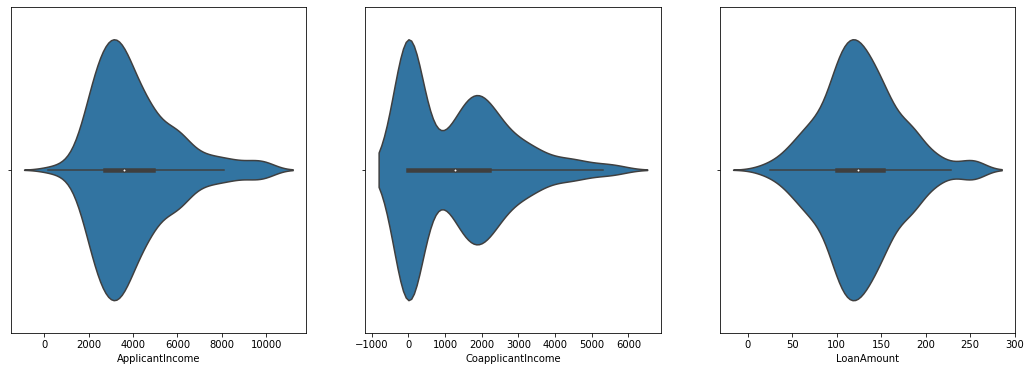

In [196]:
plt.figure(figsize=(18,6))
for i, col in enumerate(num_attribs):
  plt.subplot(1,3,i+1)
  sns.violinplot(x=col, data=train_full_c)
  
plt.show()

* It works properly

## 3.4. One-Hot Encoding

In [202]:
cat_attribs[:-2]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [210]:
train_full_c = pd.get_dummies(train_full_c)

# Drop columns
train_full_c = train_full_c.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
train_full_c.rename(columns=new, inplace=True)

In [211]:
train_full_c

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849.0,0.0,146.412162,1,0,1,0,0,0,1,0,0,1,0,0,1,1
1,4583.0,1508.0,128.000000,1,1,0,1,0,0,1,0,0,1,1,0,0,0
2,3000.0,0.0,66.000000,1,1,1,0,0,0,1,1,0,1,0,0,1,1
3,2583.0,2358.0,120.000000,1,1,1,0,0,0,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.000000,1,0,1,0,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,0,0,1,0,0,0,1,0,0,1,1,0,0,1
610,4106.0,0.0,40.000000,1,1,0,0,0,1,1,0,0,1,1,0,0,1
611,8072.0,240.0,253.000000,1,1,0,1,0,0,1,0,0,1,0,0,1,1
612,7583.0,0.0,187.000000,1,1,0,0,1,0,1,0,0,1,0,0,1,1


## 3.5. Features separating

In [227]:
X, y = train_full_c.drop(columns='Loan_Status'), train_full_c['Loan_Status']

## 3.6. SMOTE technique
* Since the number between approved and rejected loan is imbalanced, we should use SMOTE technique to avoid overfitting

In [228]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

## 3.7. Treat skewed data

### 3.7.1. User-defined Transformer 'SqrtTransformer'

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin

class SqrtTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return np.sqrt(X)

# 4. Pipeline

* It helps managing transforming process.

In [217]:
num_attribs

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [237]:
X['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
739    1
740    0
741    1
742    1
743    1
Name: Gender, Length: 744, dtype: uint8

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [229]:
num_pipeline = Pipeline([
    ('sqrt_transformer', SqrtTransformer()),
    ('scaler', StandardScaler()),
])

In [238]:
pipeline = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_attribs)
], remainder='passthrough')

In [239]:
X = pipeline.fit_transform(X)
X

array([[ 1.02704991, -1.0277728 ,  0.4896536 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39519623,  0.54582688,  0.09867236, ...,  1.        ,
         0.        ,  0.        ],
       [-0.53490117, -1.0277728 , -1.48720195, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.03461383, -1.0277728 , -0.45395137, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40774452,  0.88818544,  0.00704582, ...,  0.        ,
         0.        ,  1.        ],
       [-0.62766819, -1.0277728 , -1.81612244, ...,  0.        ,
         0.        ,  0.        ]])

In [240]:
X.shape

(744, 16)

* for better performance of machine learning

# 5. Splitting Data Set

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 6. Modeling

## 6.1. Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(f"Logistic Regression: {accuracy_score(y_test, y_pred) * 100: .2f}%")

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        74
           1       0.82      0.96      0.88        75

    accuracy                           0.87       149
   macro avg       0.88      0.87      0.87       149
weighted avg       0.88      0.87      0.87       149

[[58 16]
 [ 3 72]]
Logistic Regression:  87.25%


## 6.2. KNNClassfier

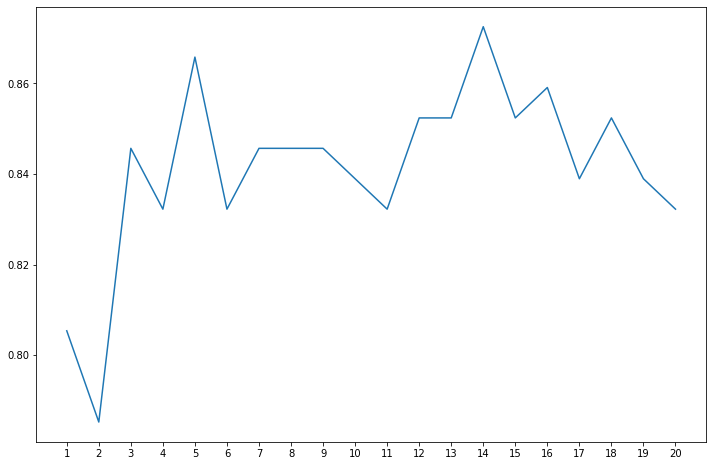

In [243]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1,21):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(X_train, y_train)
    scoreListknn.append(knn_clf.score(X_test, y_test))

plt.figure(figsize=(12,8))
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.show()

In [244]:
print(f'KNNClassifier: {max(scoreListknn)*100:.2f}%')

KNNClassifier: 87.25%


## 6.3. SVM

In [245]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(f"SVM: {accuracy_score(y_test, y_pred) * 100: .2f}%")

              precision    recall  f1-score   support

           0       0.98      0.73      0.84        74
           1       0.79      0.99      0.88        75

    accuracy                           0.86       149
   macro avg       0.88      0.86      0.86       149
weighted avg       0.88      0.86      0.86       149

[[54 20]
 [ 1 74]]
SVM:  85.91%


## 6.4. Decision Tree

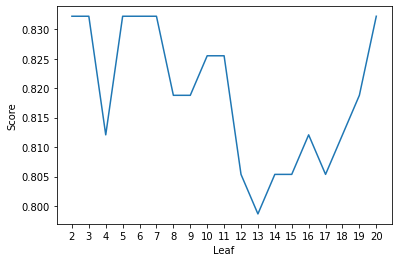

Decision Tree Accuracy: 83.22%


In [246]:
from sklearn.tree import DecisionTreeClassifier

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 6.5. Random Forest Classifier

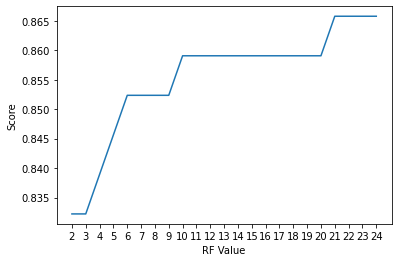

Random Forest Accuracy:  86.58%


In [247]:
from sklearn.ensemble import RandomForestClassifier

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))